In [1]:
import torch   #torch.optim  torch.nn  
import torch.nn as nn
import matplotlib.pyplot as plt
from AEP_pipeline import *   #Torch custom dataset
from cpc_1d_layers import *  # Torch custom layers 

# %load_ext autoreload   #causes bug with super

# %autoreload 2

# Hyperparameters

In [40]:
USE_GPU = False
dtype = torch.float32 
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
#data hyperparameters
batch_size = 20
terms = 7
predict_terms = 5
positive_samples = 1
nspins = 512
#model hyperparameters
conv_filter_size = 8
num_conv_filters = 2
RNN_hidden_size = 32
time_span= 30

learning_rate = 2e-5
epochs = 250

encoderparameters = (num_conv_filters,conv_filter_size)
ARparameters = (nspins/encoderparameters[1],RNN_hidden_size)


# Load Datasets

In [16]:
dataset = AEP_Dataset('datatest3.npy',terms,positive_samples,predict_terms,batch_size,time_span=time_span)
loader_train = special_data_loader(dataset,shuffle=True)

# Declaring Model

In [41]:
model = CPC_net(encoderparameters,ARparameters)
model.to(device=device,dtype=dtype)

model_optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
# model_scheduler = stuff torch.optim.lr_scheduler.StepLR(encoder_optimizer,step_size=150,gamma=0.01)
lossfunc = torch.nn.BCELoss().to(dtype=dtype)

In [18]:
#  Manual Learning Rate Decay
model_optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate /1000)

# Training Loop

In [35]:
losses = []
val_losses = []

In [ ]:
model.train()
for e in range(epochs):
#     model_scheduler.step()
    print('epoch {}'.format(e))
    loader_train.call_massage() #shuffles dataset?
    
    for bigtuple in loader_train:
        model_optimizer.zero_grad()   #resets gradients for every minibatch
        
        bigtuple = ([bigtuple[0][0].to(device=device,dtype=dtype),
                     bigtuple[0][1].to(device=device,dtype=dtype)],
                    bigtuple[1].to(device=device,dtype=dtype))
        
        probabilities = model(bigtuple[0])
        loss = lossfunc(probabilities,bigtuple[1])
        
        loss.backward()
        
        model_optimizer.step()
    losses.append(loss.item())
    print ('loss for epoch {} : {}'.format(e,loss)) 
        
        

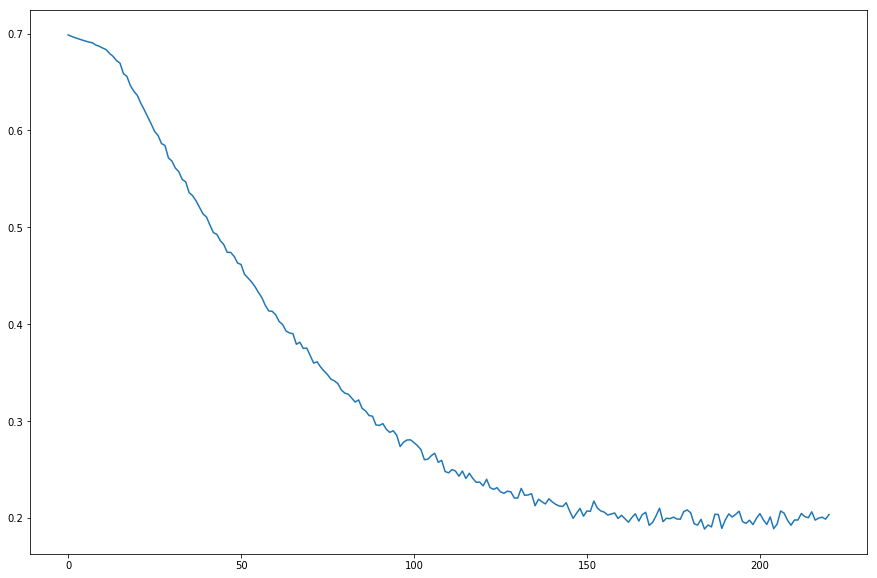

In [16]:
#Losses for 2 filters
plt.rcParams['figure.figsize'] = [15,10]
plt.plot(range(len(losses)),losses)

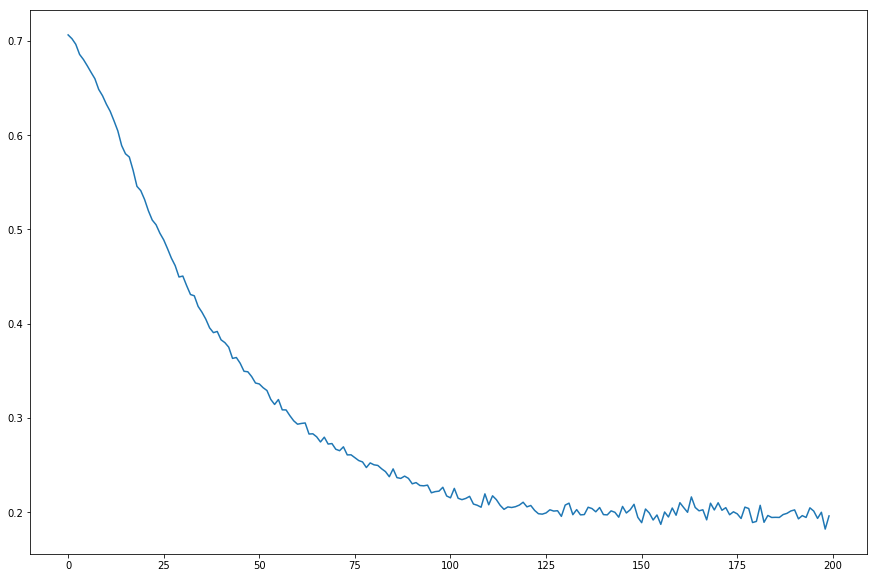

In [122]:
#Losses for 1 filter
plt.rcParams['figure.figsize'] = [15,10]
plt.plot(range(len(losses)),losses)

In [ ]:
i = 0
for _ in loader_train:
    i+=1
    if i<10:
        b = _
        data = b[0][0].to(device=device,dtype=dtype)
        encoded = model.encoder(data[0][0].view(7,1,512))
        conv1 = encoded[:,0]
        conv2 = encoded[:,1]
        plt.clf()
        thisfigure = data[0][0].view(7,512)[:,:64]
        plt.rcParams['figure.figsize'] = 50,20
        plt.imshow(thisfigure,cmap='Greys')
        ax = plt.gca()
        ax.set_xticks(np.arange(-.5, 64, 8))
        ax.set_yticks(np.arange(-.5, 7, 1))
        ax.set_xticklabels(np.arange(1, 64, 8))
        ax.set_yticklabels(np.arange(1, 7, 1))
        ax.grid(color='r',linestyle='-',linewidth=2)
        plt.savefig('Unencoded {}'.format(i))
        
        
        plt.clf()
        plt.title('2 filters')
        f,axarr = plt.subplots(1,2)
        plt.rcParams['figure.figsize'] = 20,10
        axarr[0].imshow(conv1[:,:8].detach().numpy()[:,:8],cmap='Greys')
        axarr[1].imshow(conv2[:,:8].detach().numpy()[:,:8],cmap='Greys')
        # ax = plt.gca()
        axarr[0].set_xticks(np.arange(-.5, 8, 1))
        axarr[0].set_yticks(np.arange(-.5, 7, 1))
        axarr[0].set_xticklabels(np.arange(1, 8, 1))
        axarr[0].set_yticklabels(np.arange(1, 7, 1))
        axarr[0].grid(color='r',linestyle='-',linewidth=2)

        axarr[1].set_xticks(np.arange(-.5, 8, 1))
        axarr[1].set_yticks(np.arange(-.5, 7, 1))
        axarr[1].set_xticklabels(np.arange(1, 8, 1))
        axarr[1].set_yticklabels(np.arange(1, 7, 1))
        axarr[1].grid(color='r',linestyle='-',linewidth=2)
        
        plt.savefig('Encoded 2 filter {}'.format(i))
        
        plt.clf()
        
        encoded = model2.encoder(data[0][0].view(7,1,512))
        conv1 = encoded[:,0]
#         conv2 = encoded[:,1]
        plt.title('1 filter')
        plt.rcParams['figure.figsize'] = 20,10
        plt.imshow(conv1[:,:8].detach().numpy(),cmap='Greys')
        
        ax = plt.gca()
        ax.set_xticks(np.arange(-.5, 8, 1))
        ax.set_yticks(np.arange(-.5, 7, 1))
        ax.set_xticklabels(np.arange(1, 8, 1))
        ax.set_yticklabels(np.arange(1, 7, 1))
        ax.grid(color='r',linestyle='-',linewidth=2)
        plt.savefig('Encoded 1 filter {}'.format(i))

In [23]:
data = b[0][0].to(device=device,dtype=dtype)

In [38]:
encoded = model.encoder(data[0][0].view(7,1,512))

In [51]:
conv1 = encoded[:,0]
conv2 = encoded[:,1]

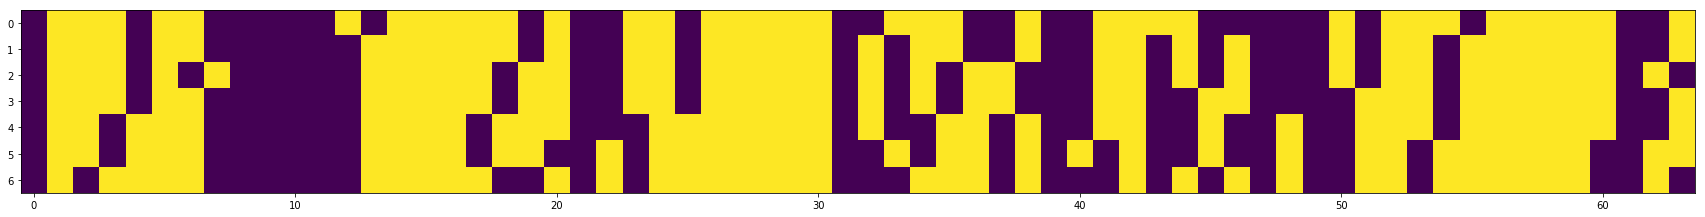

In [37]:
plt.rcParams['figure.figsize'] = 30,10
plt.imshow(data[0][0].view(7,512)[:,:64])

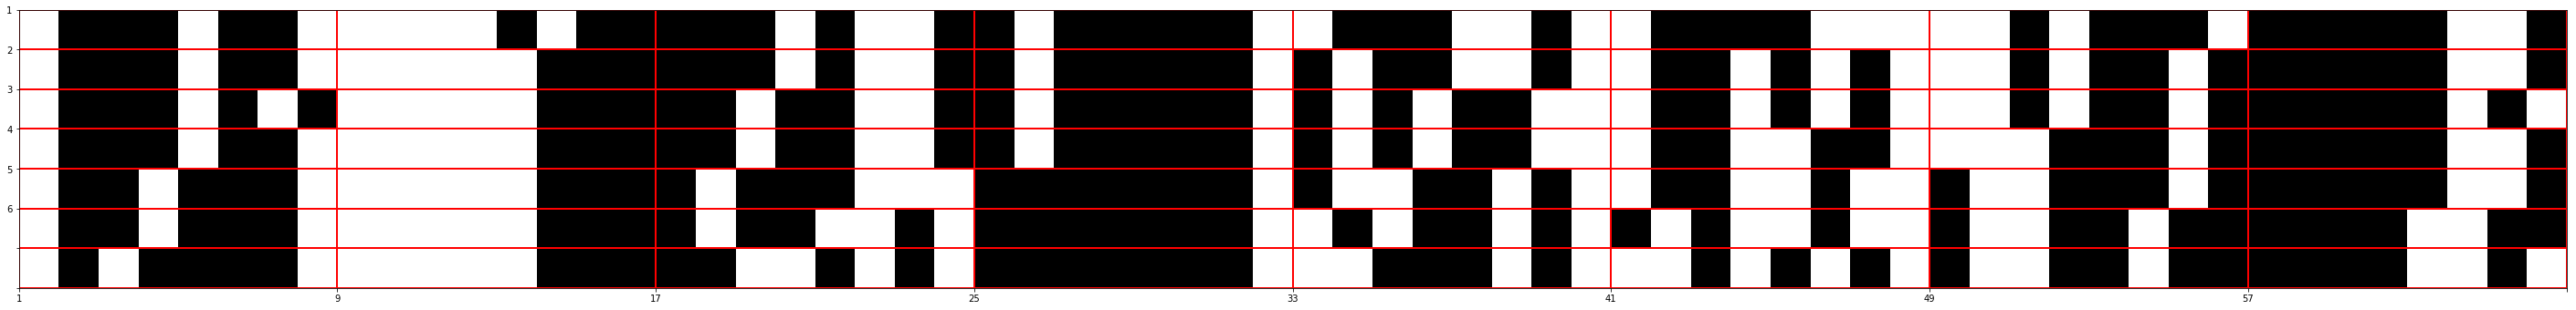

In [57]:
thisfigure = data[0][0].view(7,512)[:,:64]
plt.rcParams['figure.figsize'] = 50,20
plt.imshow(thisfigure,cmap='Greys')
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 64, 8))
ax.set_yticks(np.arange(-.5, 7, 1))
ax.set_xticklabels(np.arange(1, 64, 8))
ax.set_yticklabels(np.arange(1, 7, 1))
ax.grid(color='r',linestyle='-',linewidth=2)

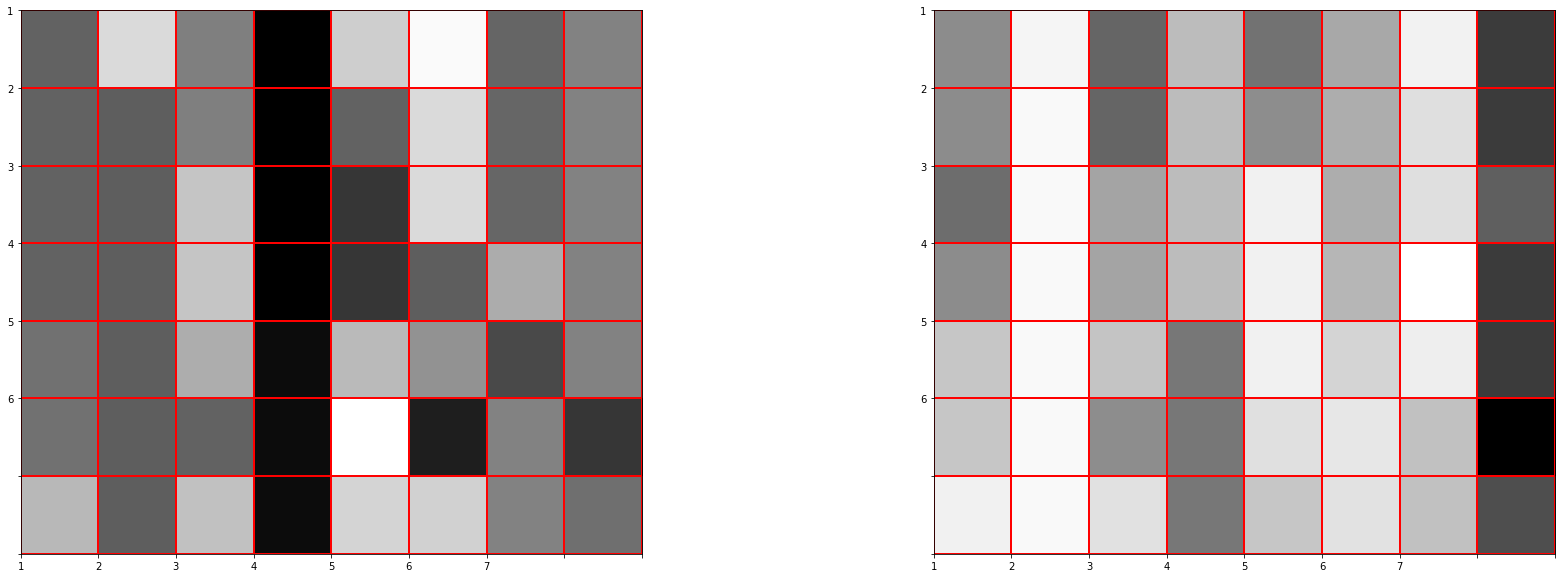

In [56]:
f,axarr = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = 20,10
axarr[0].imshow(conv1[:,:8].detach().numpy()[:,:8],cmap='Greys')
axarr[1].imshow(conv2[:,:8].detach().numpy()[:,:8],cmap='Greys')
# ax = plt.gca()
axarr[0].set_xticks(np.arange(-.5, 8, 1))
axarr[0].set_yticks(np.arange(-.5, 7, 1))
axarr[0].set_xticklabels(np.arange(1, 8, 1))
axarr[0].set_yticklabels(np.arange(1, 7, 1))
axarr[0].grid(color='r',linestyle='-',linewidth=2)

axarr[1].set_xticks(np.arange(-.5, 8, 1))
axarr[1].set_yticks(np.arange(-.5, 7, 1))
axarr[1].set_xticklabels(np.arange(1, 8, 1))
axarr[1].set_yticklabels(np.arange(1, 7, 1))
axarr[1].grid(color='r',linestyle='-',linewidth=2)